In [25]:
import pandas as pd


file_path = '/Users/vatsal/Desktop/consolidated_trace_data_final.csv'
df = pd.read_csv(file_path)
df

,Trace-id,HTTP Status Code,Path,User Agent
0,00000e83229182560bc00dc08d8d0895,200.0,/api/v1/nodes/08dd0fba-4f8b-4103-8a95-aed37312...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
1,000031b3699810ed3428b70deeab940d,NaN,NaN,NaN
2,0000ca9c0504724ec0352caf2d927e26,204.0,/api/v1/references/HTTPS:%2F%2FOWDS.ORG%2FAG.K...,Mozilla/5.0 (Linux; Android 14; SM-P620 Build/...
3,0000d58f79c6040f625be46853e6143f,200.0,/api/v1/references/d5731268-72f8-4350-8b42-d44...,NaN
4,00011f350751a533919d7355255a613e,NaN,NaN,NaN
...,...,...,...,...
217078,b411c30f385101f89919434882b3bde9,200.0,/api/v2/projects/external-id/OFCAS;ddd9d302-6a...,NaN
217079,cd4553dac4aafcc56d62819cbfab816e,200.0,/api/v2/projects/external-id/OFCAS;37171d69-4a...,NaN
217080,df940e71c54381bfa93f3194e884481c,200.0,/api/v2/projects/external-id/OFCAS;90584b67-34...,NaN
217081,ec5da04f183741db4318080fe717785e,200.0,/api/v2/projects/external-id/OFCAS;37171d69-4a...,NaN


In [6]:
# Frequency of HTTP Status Codes
http_status_freq = df['HTTP Status Code'].value_counts()
print("Frequency of HTTP Status Codes:\n", http_status_freq)

# Frequency of Paths
path_freq = df['Path'].value_counts().head(10)  # Show top 10 most frequent paths
print("\nTop 10 Frequent Paths:\n", path_freq)

# Frequency of User Agents
user_agent_freq = df['User Agent'].value_counts().head(10)  # Show top 10 user agents
print("\nTop 10 Frequent User Agents:\n", user_agent_freq)


Frequency of HTTP Status Codes:
 200.0    133227
204.0     43987
404.0      3835
201.0      2990
503.0      1784
401.0       552
0.0          70
400.0        37
500.0        34
202.0        13
409.0         8
415.0         7
301.0         3
499.0         2
403.0         1
Name: HTTP Status Code, dtype: int64

Top 10 Frequent Paths:
 /api/healthz                                                   36748
/api/v2/versions                                               35871
/api/v1/capabilities                                           10322
/api/v1/nodes/root                                              3620
/api/v1/oems/69bf8dd4-c21e-45ee-bb8c-a6a2d907989b               2955
/api/v1/identities                                              2832
/api/v2/assets/08dac0aa-8ed5-4ee8-866f-1c22990e0ef0/nodes       1209
/api/v2/nodes/08dac0aa-8ed5-4ee8-866f-1c22990e0ef0/projects     1207
/api/v2/nodes/c630c9a3-16de-49e6-bcfe-c34cb5032f34/projects      765
/api/v2/assets/c630c9a3-16de-49e6-bcfe-c34cb

In [7]:
# Group by Trace-id and aggregate HTTP Status Codes, Paths, and User Agents
grouped_data = df.groupby('Trace-id').agg({
    'HTTP Status Code': lambda x: list(x.unique()),  # List of unique status codes per trace
    'Path': lambda x: list(x.unique()),  # List of unique paths per trace
    'User Agent': lambda x: list(x.unique())  # List of unique user agents per trace
}).reset_index()

print("\nSample Grouped Data by Trace-id:\n", grouped_data.head())



Sample Grouped Data by Trace-id:
                            Trace-id HTTP Status Code  \
0  00000e83229182560bc00dc08d8d0895          [200.0]   
1  000031b3699810ed3428b70deeab940d            [nan]   
2  0000ca9c0504724ec0352caf2d927e26          [204.0]   
3  0000d58f79c6040f625be46853e6143f          [200.0]   
4  00011f350751a533919d7355255a613e            [nan]   

                                                Path  \
0  [/api/v1/nodes/08dd0fba-4f8b-4103-8a95-aed3731...   
1                                              [nan]   
2  [/api/v1/references/HTTPS:%2F%2FOWDS.ORG%2FAG....   
3  [/api/v1/references/d5731268-72f8-4350-8b42-d4...   
4                                              [nan]   

                                          User Agent  
0  [Mozilla/5.0 (Windows NT 10.0; Win64; x64) App...  
1                                              [nan]  
2  [Mozilla/5.0 (Linux; Android 14; SM-P620 Build...  
3                                              [nan]  
4               

In [8]:
# Filter uncommon or potentially malicious user agents
uncommon_user_agents = df['User Agent'].value_counts().tail(10)  # Show least common user agents
print("\nLeast Common User Agents:\n", uncommon_user_agents)

# Check for specific keywords in user agents
suspicious_agents = df[df['User Agent'].str.contains('bot|crawl|spider', case=False, na=False)]
print("\nSuspicious User Agents:\n", suspicious_agents.head())



Least Common User Agents:
 Mozilla/5.0 (Fedora; Linux i686) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Safari/537.36                                              1
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36                               1
Mozilla/5.0 (iPhone; CPU iPhone OS 18_0_0 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) CriOS/131.0.6778.73 Mobile/15E148 Safari/604.1    1
Mozilla/5.0 (Ubuntu; Linux x86_64; rv:120.0) Gecko/20100101 Firefox/120.0                                                                           1
Mozilla/5.0 (Windows NT 6.2; rv:128.0) Gecko/20100101 Firefox/128.0                                                                                 1
Mozilla/5.0 (Debian; Linux i686) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36                                              1
Mozilla/5.0 (ZZ; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ch

In [10]:
# Ensure all values in the Path column are strings and handle NaN values
df['Path'] = df['Path'].fillna('').astype(str)

# Analyze the length and content of paths
df['Path_Length'] = df['Path'].apply(len)  # Calculate path length

# Statistics of Path Length
path_length_stats = df['Path_Length'].describe()
print("\nStatistics of Path Length:\n", path_length_stats)

# Detect paths with unusual lengths (e.g., extremely long or short)
outlier_paths = df[
    (df['Path_Length'] > path_length_stats['75%'] + 1.5 * (path_length_stats['75%'] - path_length_stats['25%'])) | 
    (df['Path_Length'] < path_length_stats['25%'] - 1.5 * (path_length_stats['75%'] - path_length_stats['25%']))
]
print("\nOutlier Paths Based on Length:\n", outlier_paths.head())



Statistics of Path Length:
 count    217083.000000
mean         32.033278
std          24.651022
min           0.000000
25%          12.000000
50%          18.000000
75%          59.000000
max          76.000000
Name: Path_Length, dtype: float64

Outlier Paths Based on Length:
 Empty DataFrame
Columns: [Trace-id, HTTP Status Code, Path, User Agent, Path_Length]
Index: []


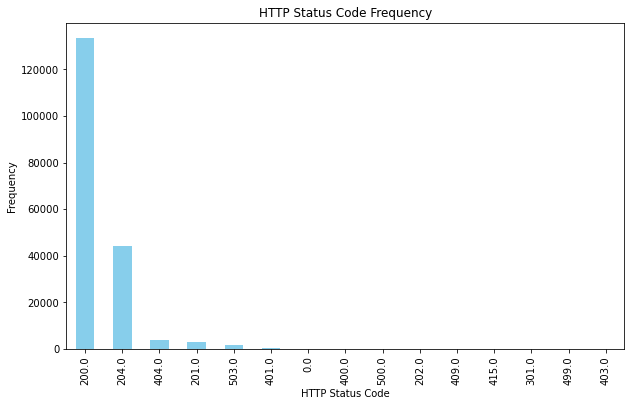

In [11]:
import matplotlib.pyplot as plt

# Plot HTTP Status Code frequencies
http_status_freq.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("HTTP Status Code Frequency")
plt.xlabel("HTTP Status Code")
plt.ylabel("Frequency")
plt.show()


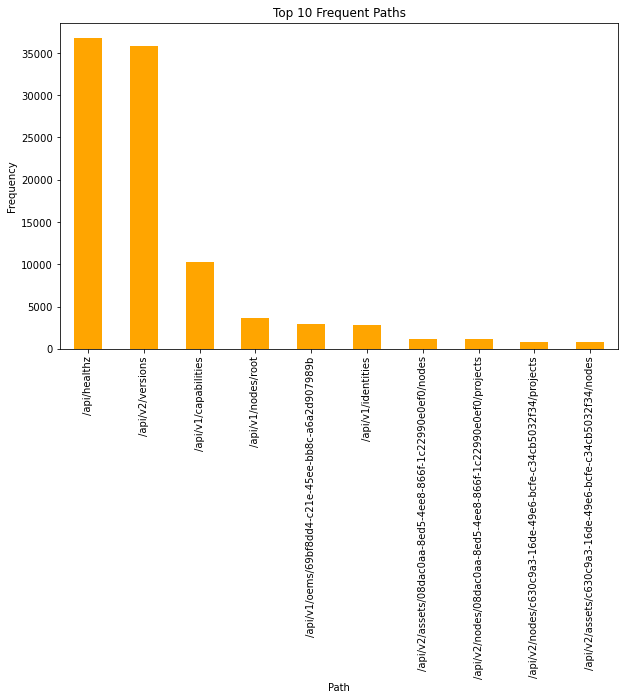

In [12]:
# Plot top 10 paths
path_freq.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title("Top 10 Frequent Paths")
plt.xlabel("Path")
plt.ylabel("Frequency")
plt.show()


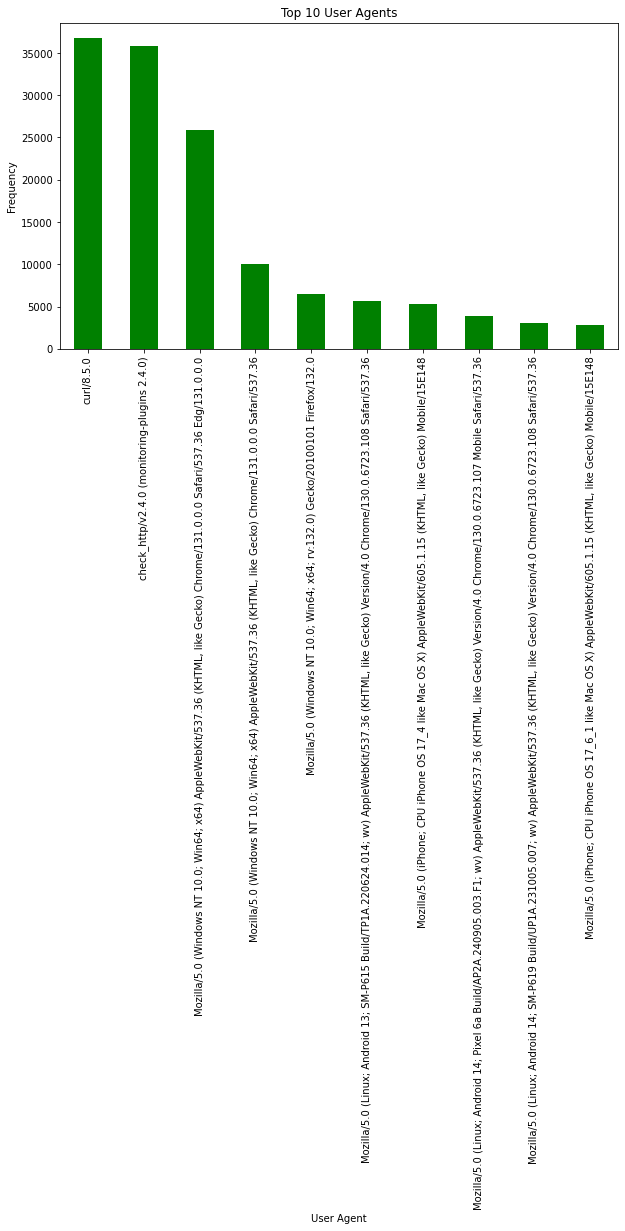

In [13]:
# Plot top 10 user agents
user_agent_freq.plot(kind='bar', color='green', figsize=(10, 6))
plt.title("Top 10 User Agents")
plt.xlabel("User Agent")
plt.ylabel("Frequency")
plt.show()


In [17]:
# Count occurrences of HTTP status codes per User Agent or IP
failed_access = df[df['HTTP Status Code'].isin(['404', '403', '500'])]
failed_access_summary = failed_access.groupby('User Agent')['HTTP Status Code'].count().reset_index()
failed_access_summary.columns = ['User Agent', 'Failed Access Count']

# Identify user agents exceeding a threshold
threshold = 2  # Set threshold for repeated failures
suspicious_agents = failed_access_summary[failed_access_summary['Failed Access Count'] > threshold]
print("Suspicious User Agents:\n", suspicious_agents)


Suspicious User Agents:
 Empty DataFrame
Columns: [User Agent, Failed Access Count]
Index: []


In [18]:
import re

# Define suspicious patterns for SQL Injection and XSS
sql_xss_patterns = [
    r"(?i)select.*from",  # SELECT statements
    r"(?i)union.*select", # UNION SELECT
    r"<script.*?>",       # XSS script tags
    r"(?i)drop.*table"    # DROP statements
]

# Function to detect suspicious patterns in paths
def detect_suspicious_patterns(path):
    for pattern in sql_xss_patterns:
        if re.search(pattern, path):
            return True
    return False

# Apply detection function
df['Suspicious Path'] = df['Path'].apply(lambda x: detect_suspicious_patterns(str(x)))
suspicious_requests = df[df['Suspicious Path']]
print("Suspicious Requests with Potential SQL Injection or XSS:\n", suspicious_requests[['Path', 'HTTP Status Code']])


Suspicious Requests with Potential SQL Injection or XSS:
 Empty DataFrame
Columns: [Path, HTTP Status Code]
Index: []


In [19]:
# Define sensitive paths
restricted_paths = ['/admin', '/login', '/config', '/db', '/api/keys']

# Check for access to restricted paths
df['Access to Restricted'] = df['Path'].apply(lambda x: any(rp in x for rp in restricted_paths))
unauthorized_access = df[(df['Access to Restricted']) & (df['HTTP Status Code'] == '200')]
print("Unauthorized Access to Restricted Paths:\n", unauthorized_access[['Path', 'User Agent', 'HTTP Status Code']])


Unauthorized Access to Restricted Paths:
 Empty DataFrame
Columns: [Path, User Agent, HTTP Status Code]
Index: []


In [22]:
# Group by Trace-id and analyze sequential requests
grouped_by_trace = df.groupby('Trace-id')

# Define a function to detect repeated attempts
def detect_brute_force(group):
    if group.empty:
        return False
    login_attempts = group[group['Path'].str.contains('/login', na=False)]
    return len(login_attempts) > 5  # Threshold for brute-force

# Apply detection and store results in a new DataFrame
brute_force_detected = grouped_by_trace.apply(detect_brute_force).reset_index()
brute_force_detected.columns = ['Trace-id', 'Brute Force Detected']

# Debug: Print the resulting DataFrame
print("Brute Force Detection Results:")
print(brute_force_detected.head())

# Merge the detection results back into the main DataFrame
df = df.merge(brute_force_detected, on='Trace-id', how='left')

# Debug: Check if the column is added
if 'Brute Force Detected' in df.columns:
    print("'Brute Force Detected' column added successfully.")
else:
    raise KeyError("'Brute Force Detected' column was not added to the DataFrame.")

# Filter rows where brute force was detected
brute_force_traces = df[df['Brute Force Detected'] == True]

# Display results
print("Traces with Potential Brute Force Attempts:\n", brute_force_traces[['Trace-id', 'Path']])


Brute Force Detection Results:
                           Trace-id  Brute Force Detected
0  00000e83229182560bc00dc08d8d0895                 False
1  000031b3699810ed3428b70deeab940d                 False
2  0000ca9c0504724ec0352caf2d927e26                 False
3  0000d58f79c6040f625be46853e6143f                 False
4  00011f350751a533919d7355255a613e                 False
'Brute Force Detected' column added successfully.
Traces with Potential Brute Force Attempts:
 Empty DataFrame
Columns: [Trace-id, Path]
Index: []


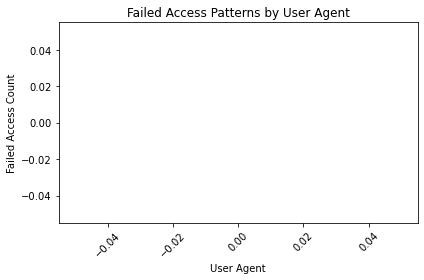

In [23]:
import matplotlib.pyplot as plt

# Plot failed access counts
failed_access_summary.sort_values('Failed Access Count', ascending=False, inplace=True)
plt.bar(failed_access_summary['User Agent'], failed_access_summary['Failed Access Count'])
plt.xlabel('User Agent')
plt.ylabel('Failed Access Count')
plt.title('Failed Access Patterns by User Agent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



IndexError: index 0 is out of bounds for axis 0 with size 0

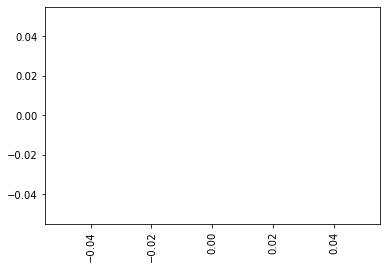

In [24]:
# Bar plot of suspicious paths
suspicious_path_counts = suspicious_requests['Path'].value_counts()
suspicious_path_counts.plot(kind='bar', color='red')
plt.xlabel('Path')
plt.ylabel('Frequency')
plt.title('Suspicious Path Access Frequency')
plt.show()


### Model Implementation


In [26]:

# Display the first few rows
print("Dataset Head:\n", df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary of dataset
print("\nDataset Info:")
print(df.info())


Dataset Head:
                            Trace-id  HTTP Status Code  \
0  00000e83229182560bc00dc08d8d0895             200.0   
1  000031b3699810ed3428b70deeab940d               NaN   
2  0000ca9c0504724ec0352caf2d927e26             204.0   
3  0000d58f79c6040f625be46853e6143f             200.0   
4  00011f350751a533919d7355255a613e               NaN   

                                                Path  \
0  /api/v1/nodes/08dd0fba-4f8b-4103-8a95-aed37312...   
1                                                NaN   
2  /api/v1/references/HTTPS:%2F%2FOWDS.ORG%2FAG.K...   
3  /api/v1/references/d5731268-72f8-4350-8b42-d44...   
4                                                NaN   

                                          User Agent  
0  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...  
1                                                NaN  
2  Mozilla/5.0 (Linux; Android 14; SM-P620 Build/...  
3                                                NaN  
4                             

In [27]:
# Fill missing values in categorical columns with 'Unknown'
categorical_columns = ['Path', 'User Agent']
for col in categorical_columns:
    df[col] = df[col].fillna('Unknown')

# Fill missing values in numerical columns with 0
numerical_columns = ['HTTP Status Code']  # Add more if necessary
for col in numerical_columns:
    df[col] = df[col].fillna(0)


In [28]:
df

,Trace-id,HTTP Status Code,Path,User Agent
0,00000e83229182560bc00dc08d8d0895,200.0,/api/v1/nodes/08dd0fba-4f8b-4103-8a95-aed37312...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
1,000031b3699810ed3428b70deeab940d,0.0,Unknown,Unknown
2,0000ca9c0504724ec0352caf2d927e26,204.0,/api/v1/references/HTTPS:%2F%2FOWDS.ORG%2FAG.K...,Mozilla/5.0 (Linux; Android 14; SM-P620 Build/...
3,0000d58f79c6040f625be46853e6143f,200.0,/api/v1/references/d5731268-72f8-4350-8b42-d44...,Unknown
4,00011f350751a533919d7355255a613e,0.0,Unknown,Unknown
...,...,...,...,...
217078,b411c30f385101f89919434882b3bde9,200.0,/api/v2/projects/external-id/OFCAS;ddd9d302-6a...,Unknown
217079,cd4553dac4aafcc56d62819cbfab816e,200.0,/api/v2/projects/external-id/OFCAS;37171d69-4a...,Unknown
217080,df940e71c54381bfa93f3194e884481c,200.0,/api/v2/projects/external-id/OFCAS;90584b67-34...,Unknown
217081,ec5da04f183741db4318080fe717785e,200.0,/api/v2/projects/external-id/OFCAS;37171d69-4a...,Unknown


In [29]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))


In [30]:
if 'Label' in df.columns:
    print("Label column exists.")
    print(df['Label'].value_counts())  # Check the distribution of labels
else:
    print("Label column is missing!")


Label column is missing!


In [31]:
# Define a function to assign labels
def assign_label(http_status):
    if http_status in [404, 403, 500]:
        return 1  # Malicious
    else:
        return 0  # Benign

# Apply the function to create a Label column
df['Label'] = df['HTTP Status Code'].apply(assign_label)


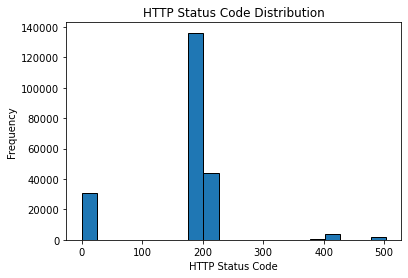

In [32]:
import matplotlib.pyplot as plt

# Visualize the distribution of HTTP status codes
plt.hist(df['HTTP Status Code'], bins=20, edgecolor='k')
plt.xlabel('HTTP Status Code')
plt.ylabel('Frequency')
plt.title('HTTP Status Code Distribution')
plt.show()


In [33]:
from sklearn.utils import resample

# Check class distribution
print(df['Label'].value_counts())

# Optionally balance the classes (if necessary)
df_majority = df[df['Label'] == 0]
df_minority = df[df['Label'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)

# Combine majority and upsampled minority classes
df_balanced = pd.concat([df_majority, df_minority_upsampled])

print(df_balanced['Label'].value_counts())


0    213213
1      3870
Name: Label, dtype: int64
0    213213
1    213213
Name: Label, dtype: int64


# Using Clustering to Create Labels

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df['Path'] = df['Path'].fillna('').astype(str)

df['Path_Length'] = df['Path'].str.len()
df['Request_Frequency'] = df.groupby('Trace-id')['Trace-id'].transform('count')



# Select features for clustering
features = df[['HTTP Status Code', 'Path_Length', 'Request_Frequency']]

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)


In [38]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(normalized_features)


In [39]:
print(df.groupby('Cluster').mean())  # Summary statistics by cluster



         HTTP Status Code  User Agent     Label  Path_Length  \
Cluster                                                        
0              179.141749  142.292119  0.017491     4.004345   
1              261.613725  163.066667  0.160784     2.970588   

         Request_Frequency  
Cluster                     
0                 1.000000  
1                 2.058824  


In [40]:
df['Label'] = df['Cluster'].map({0: 0, 1: 1})  # Example mapping


In [44]:
# Select features and labels
features = ['HTTP Status Code', 'Path', 'User Agent']  # Include other relevant columns if needed
X = df[features]
y = df['Label']

print("\nFeature Sample:\n", X.head())
print("\nLabels Sample:\n", y.head())



Feature Sample:
    HTTP Status Code   Path  User Agent
0             200.0   5034         112
1               0.0  11593         185
2             204.0   8500          53
3             200.0   9350         185
4               0.0  11593         185

Labels Sample:
 0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Data Preprocessing Implementation


In [47]:
# Encode categorical columns
categorical_columns = ['Path', 'User Agent']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Select features and labels
features = df[['HTTP Status Code', 'Path', 'User Agent']]  # Add more relevant columns if needed
labels = df['Label']  # Assuming 'Label' column is present

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [48]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


In [49]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test, y_pred))

# Feature importance
importances = rf_model.feature_importances_
feature_names = features.columns
print("\nFeature Importances:")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


Confusion Matrix:
 [[64956     4]
 [   34   131]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     64960
           1       0.97      0.79      0.87       165

    accuracy                           1.00     65125
   macro avg       0.98      0.90      0.94     65125
weighted avg       1.00      1.00      1.00     65125


Accuracy Score:
 0.9994165067178503

Feature Importances:
HTTP Status Code: 0.1156
Path: 0.7509
User Agent: 0.1334


In [52]:


# Select relevant features for clustering (modify columns as needed)
clustering_features = df[['HTTP Status Code', 'Path', 'User Agent']].copy()

# Ensure features are numeric (encode categorical if not already done)
clustering_features['Path'] = clustering_features['Path'].astype(str)
clustering_features['User Agent'] = clustering_features['User Agent'].astype(str)

# Encode categorical features (if not done earlier)
from sklearn.preprocessing import LabelEncoder
le_path = LabelEncoder()
le_user_agent = LabelEncoder()
clustering_features['Path'] = le_path.fit_transform(clustering_features['Path'])
clustering_features['User Agent'] = le_user_agent.fit_transform(clustering_features['User Agent'])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
df['Cluster_Labels'] = kmeans.fit_predict(clustering_features)

# Save the updated dataset
output_file = "/Users/vatsal/Desktop/consolidated_trace_data_with_clusters.csv"
df.to_csv(output_file, index=False)
print(f"Cluster labels added and saved to {output_file}")


Cluster labels added and saved to /Users/vatsal/Desktop/consolidated_trace_data_with_clusters.csv


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
file_path = "/Users/vatsal/Desktop/consolidated_trace_data_with_clusters.csv"  # Path to your transformed dataset
df = pd.read_csv(file_path)

# Ensure the K-Means clustering labels are present
if 'Cluster_Labels' not in df.columns:
    raise ValueError("K-Means cluster labels are not present in the dataset. Ensure clustering is completed.")

# Step 2: Encode categorical variables
categorical_columns = ['Path', 'User Agent']  # Update with relevant categorical columns
label_encoders = {}  # To store encoders for inverse transformation if needed

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Step 3: Prepare features
# Combine K-Means cluster labels as an additional feature
df['Cluster_Labels'] = df['Cluster_Labels'].astype(int)  # Ensure labels are integers

features = df[['HTTP Status Code', 'Path', 'User Agent', 'Cluster_Labels']]  # Add more columns if needed

# Step 4: Define the label column (ensure it's available in the dataset)
if 'Label' not in df.columns:
    raise ValueError("No 'Label' column found in the dataset. Add labels for classification (1: malicious, 0: benign).")

labels = df['Label']

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Display shapes to verify
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (151958, 4)
Testing Data Shape: (65125, 4)


In [54]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)


In [55]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test, y_pred))

# Feature importance
importances = rf_model.feature_importances_
feature_names = features.columns
print("\nFeature Importances:")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


Confusion Matrix:
 [[64952     8]
 [   35   130]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     64960
           1       0.94      0.79      0.86       165

    accuracy                           1.00     65125
   macro avg       0.97      0.89      0.93     65125
weighted avg       1.00      1.00      1.00     65125


Accuracy Score:
 0.9993397312859885

Feature Importances:
HTTP Status Code: 0.1187
Path: 0.7473
User Agent: 0.1152
Cluster_Labels: 0.0188
